In [1]:
# Multiple Linear Regression
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

data=pd.read_csv('50_Startups.csv')
x=data.iloc[:,:-1].values
y=data.iloc[:,4].values

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder_x=LabelEncoder()
x[:,3]=labelencoder_x.fit_transform(x[:,3])

onehotencoder=OneHotEncoder(categorical_features=[3])
x = onehotencoder.fit_transform(x).toarray()

data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [2]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


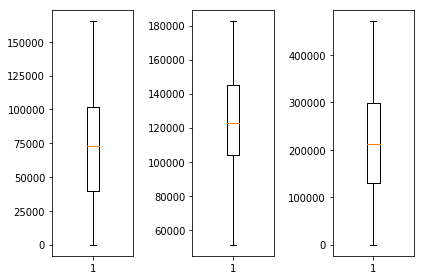

In [3]:
f, (ax1, ax2 , ax3) = plt.subplots(1, 3)

ax1.boxplot(data["R&D Spend"])

ax2.boxplot(data["Administration"])

ax3.boxplot(data["Marketing Spend"])

plt.tight_layout()

In [4]:
from sklearn.model_selection import train_test_split
x2_train,x2_test,y2_train,y2_test=train_test_split(x,y,test_size=0.2,random_state=0)
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x2_train,y2_train)
y2_pred=reg.predict(x2_test)

In [5]:
b={"actual":y2_test.flatten(),"predicted":y2_pred.flatten()}
df2=pd.DataFrame(b)
df2

,actual,predicted
0,103282.38,103015.201598
1,144259.40,132582.277608
2,146121.95,132447.738452
3,77798.83,71976.098513
4,191050.39,178537.482211
5,105008.31,116161.242302
6,81229.06,67851.692097
7,97483.56,98791.733747
8,110352.25,113969.435330
9,166187.94,167921.065696


In [6]:
import sklearn.metrics as mt
print(np.sqrt(mt.mean_squared_error(y2_train,reg.predict(x2_train))))
print(np.sqrt(mt.mean_squared_error(y2_test,reg.predict(x2_test))))

9031.66661257897
9137.990152795797


In [7]:
import statsmodels.formula.api as sm
x=x[:,1:]
x=np.append(arr=np.ones((50,1)).astype(int),values=x,axis=1)
x_opt=x[:,[0,1,2,3,4,5]]
reg2=sm.OLS(endog=y,exog=x_opt).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 11 Mar 2020   Prob (F-statistic):           1.34e-27
Time:                        20:32:39   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x2           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
x_opt=x[:,[0,1,3,4,5]]
reg2=sm.OLS(endog=y,exog=x_opt).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 11 Mar 2020   Prob (F-statistic):           8.49e-29
Time:                        20:32:39   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
x2             0.8060      0.046     17.606      0.000       0.714       0.898
x3            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x4             0.0270      0.017      1.592      0.118      -0.007       0.061
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
x_opt=x[:,[0,3,4,5]]
reg2=sm.OLS(endog=y,exog=x_opt).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 11 Mar 2020   Prob (F-statistic):           4.53e-30
Time:                        20:32:40   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
x_opt=x[:,[0,3,5]]
reg2=sm.OLS(endog=y,exog=x_opt).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Wed, 11 Mar 2020   Prob (F-statistic):           2.16e-31
Time:                        20:32:40   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x_opt,y,test_size=0.2,random_state=0)
reg1=LinearRegression()
reg1.fit(x_train,y_train)
y_pred=reg1.predict(x_test)

In [12]:
a={"actual":y_test.flatten(),"predicted":y_pred.flatten()}
df1=pd.DataFrame(a)
df1

,actual,predicted
0,103282.38,102284.646052
1,144259.40,133873.923838
2,146121.95,134182.149517
3,77798.83,73701.106936
4,191050.39,180642.252997
5,105008.31,114717.249039
6,81229.06,68335.075753
7,97483.56,97433.459223
8,110352.25,114580.921365
9,166187.94,170343.319795


In [13]:
import sklearn.metrics as mt
print(np.sqrt(mt.mean_squared_error(y_train,reg1.predict(x_train))))
print(np.sqrt(mt.mean_squared_error(y_test,reg1.predict(x_test))))

9078.617918486692
8198.797190788484
